In [35]:
import numpy as np
import matplotlib.pyplot as plt
from math import cos, pi

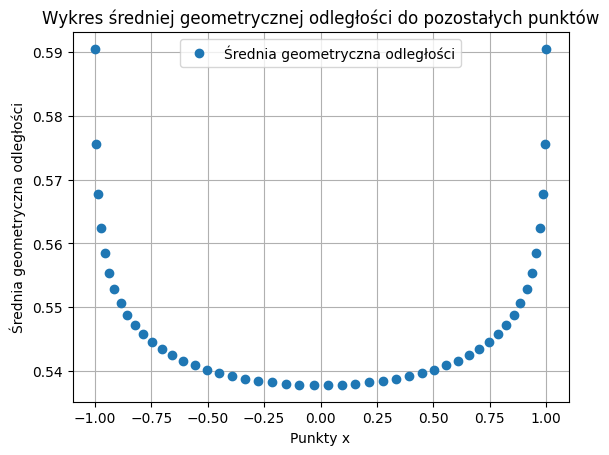

In [36]:
def plot_geometric_mean_distances(x):
    """
    Funkcja przyjmuje wektor punktów x z przedziału.
    Dla każdego punktu x[i] oblicza średnią geometryczną odległości od x[i] do pozostałych punktów,
    a następnie tworzy wykres, na którym na osi y znajduje się średnia geometryczna odległości danego
    punktu do innyfch punktów.
    """
    x = np.array(x)
    n = len(x)
    y = np.zeros(n)
    
    # Dla każdego punktu x[i] obliczamy odległości do pozostałych punktów
    for i in range(n):
        # bez punktu x[i]
        distances = np.abs(x[i] - np.delete(x, i))

        # Średnia geometryczna: exp(mean(log(distances)))
        y[i] = np.exp(np.mean(np.log(distances)))
    
    # Tworzenie wykresu
    plt.plot(x, y, 'o', label='Średnia geometryczna odległości')
    plt.xlabel('Punkty x')
    plt.ylabel('Średnia geometryczna odległości')
    plt.title('Wykres średniej geometrycznej odległości do pozostałych punktów')
    plt.legend()
    plt.grid(True)
    plt.show()

def generateChebyshevPoints(n):
    return [-cos((2*i + 1)*pi / (2*(n+1))) for i in range(n+1)]


def generateLegendrePoints(n):
    coef = np.zeros(n + 1)
    coef[-1] = 1
    return np.polynomial.legendre.legroots(coef)

def generateEquispacedPoints(n):
    return np.linspace(-1, 1, n)

points = generateLegendrePoints(50)
plot_geometric_mean_distances(points)